# **Step 1: Install and Import Required Libraries**

In [143]:
!pip install -r /content/requirements.txt

In [144]:
# Import the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

# **Step 2: Load the Dataset**

In [145]:
# Load the dataset from a CSV file
df = pd.read_csv('/content/pima-indians-diabetes.csv')

# **Step 3: Data Pre-Processing & Feature Selection**

In [146]:
# Display first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [147]:
# Display first few rows of the dataset
print(df.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [148]:
# number of rows and columns in the dataset
print(df.shape)

(768, 9)


In [149]:
# getting some info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [150]:
# checking for data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [151]:
# checking for null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [152]:
# statistical measures about the data
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [153]:
# checking the distribution of all Variables
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [154]:
# checking the distribution of Outcome Variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

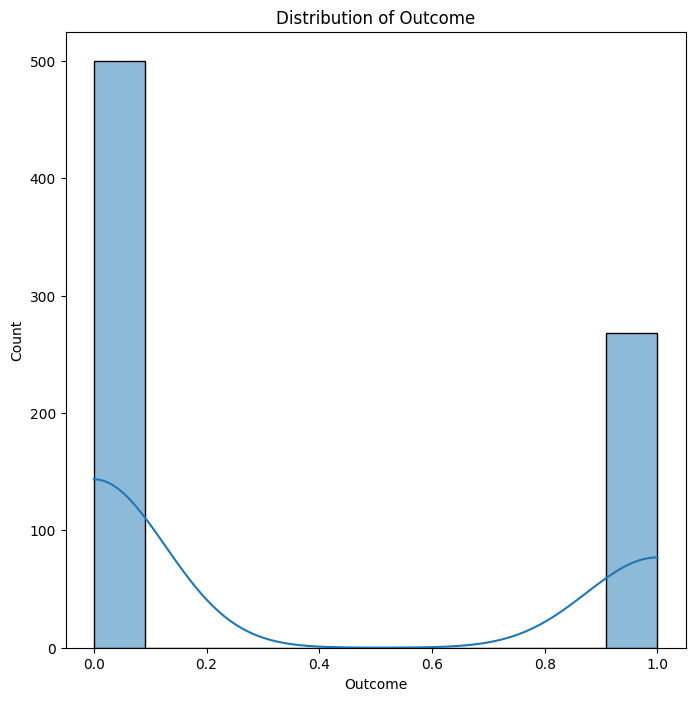

In [155]:
# Plot the distribution of the 'Outcome'
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(df.Outcome, kde=True, ax=ax)
ax.set_title('Distribution of Outcome')
plt.show()

**Filling Missing Values**

In [156]:
# Fill missing values with the median value
df.fillna(df.median(), inplace=True)

**Noisy Data**

In [157]:
# Remove rows where certain columns have zero values
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] != 0) & (df['Insulin'] != 0) & (df['BMI'] != 0)]

**Removal of Outliers**

In [158]:
# Removing outliers using Z-score
from scipy.stats import zscore
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

**Transforming Categorical Variables**

In [159]:
# No categorical variables in this dataset
# df['Category'] = pd.Categorical(df['Category']).codes

# **Step 4: Data Visualization**

**Bar Chart**

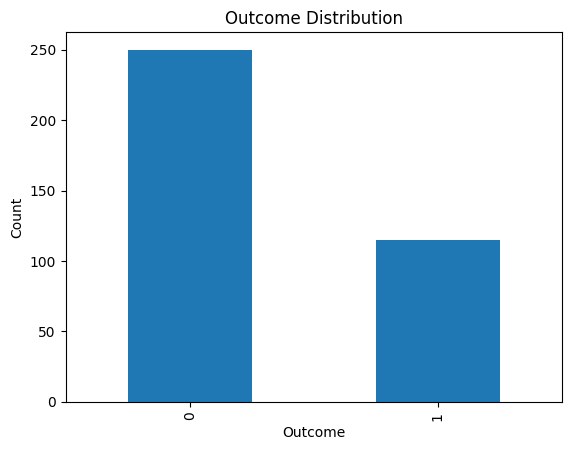

In [160]:
# Plot a bar chart
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

**Heat Map**

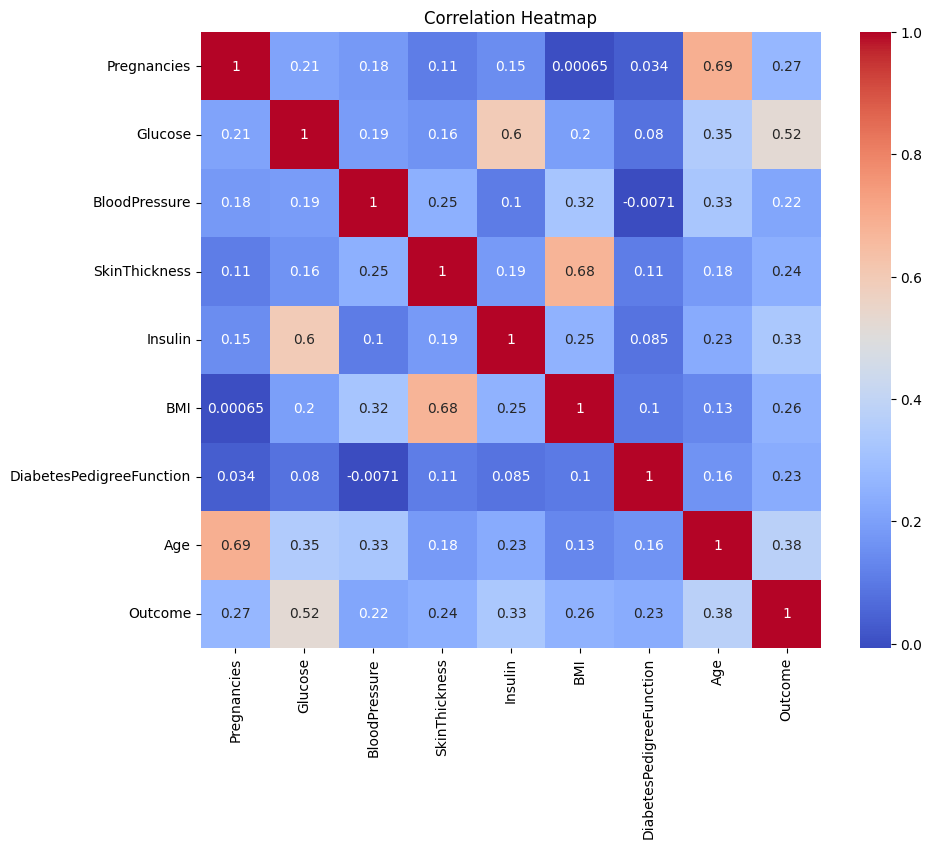

In [161]:
# Plot a heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Histogram**

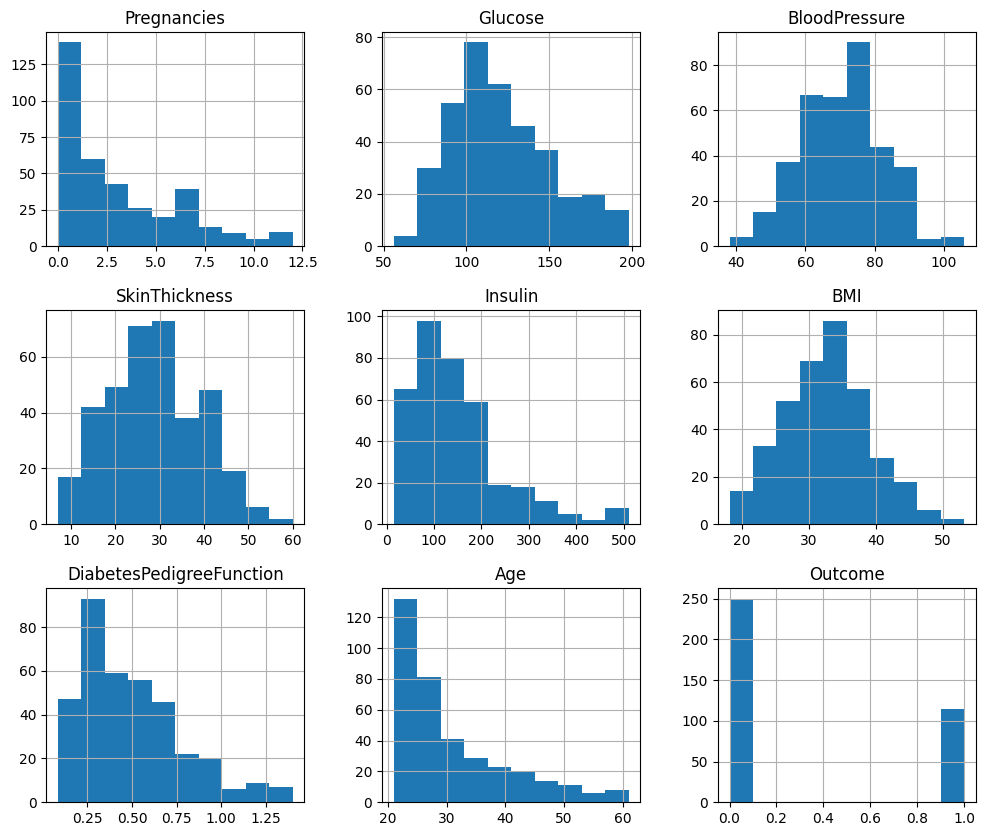

In [162]:
# Plot histograms for each feature
df.hist(figsize=(12, 10))
plt.show()

**Pie Chart**

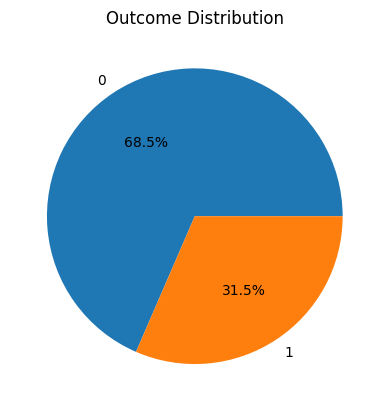

In [163]:
# Plot a pie chart
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.ylabel('')
plt.show()

**Tree Map**

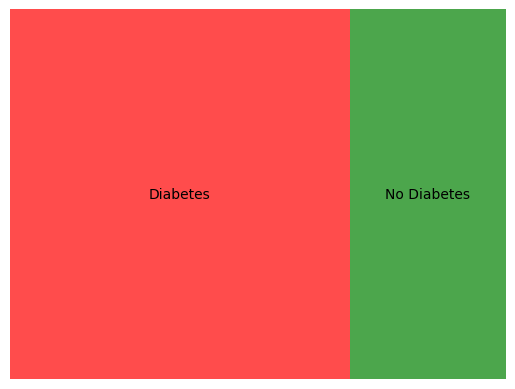

In [164]:
# Treemap (if you have categories, here is an example using squarify)
import squarify
sizes = df['Outcome'].value_counts()
labels = ['Diabetes', 'No Diabetes']
colors = ['red', 'green']
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')
plt.show()

# **Step 5: Splitting and Training the Data**

In [165]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
6              3       78             50             32       88  31.0   
14             5      166             72             19      175  25.8   
16             0      118             84             47      230  45.8   
19             1      115             70             30       96  34.6   
..           ...      ...            ...            ...      ...   ...   
751            1      121             78             39       74  39.0   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
6                  

In [166]:
X = df.drop('Outcome', axis=1)

In [167]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
6              3       78             50             32       88  31.0   
14             5      166             72             19      175  25.8   
16             0      118             84             47      230  45.8   
19             1      115             70             30       96  34.6   
..           ...      ...            ...            ...      ...   ...   
751            1      121             78             39       74  39.0   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  
3                       0.167   21  
6                       0.248   26  


In [168]:
y = df['Outcome']

In [169]:
print(y)

3      0
6      1
14     1
16     1
19     1
      ..
751    0
753    1
755    1
760    0
765    0
Name: Outcome, Length: 365, dtype: int64


In [170]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
print(X.shape, X_train.shape, X_test.shape)

(365, 8) (292, 8) (73, 8)


In [172]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
450            1       82             64             13       95  21.2   
711            5      126             78             27       22  29.6   
429            1       95             82             25      180  35.0   
174            2       75             64             24       55  29.7   
197            3      107             62             13       48  22.9   
..           ...      ...            ...            ...      ...   ...   
165            6      104             74             18      156  29.9   
243            6      119             50             22      176  27.1   
563            6       99             60             19       54  26.9   
726            1      116             78             29      180  36.1   
232            1       79             80             25       37  25.4   

     DiabetesPedigreeFunction  Age  
450                     0.415   23  
711                     0.439   40  


In [173]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
415            3      173             84             33      474  35.7   
94             2      142             82             18       64  24.7   
51             1      101             50             15       36  24.2   
648           11      136             84             35      130  28.3   
136            0      100             70             26       50  30.8   
..           ...      ...            ...            ...      ...   ...   
431            3       89             74             16       85  30.4   
191            9      123             70             44       94  33.1   
216            5      109             62             41      129  35.8   
414            0      138             60             35      167  34.6   
680            2       56             56             28       45  24.2   

     DiabetesPedigreeFunction  Age  
415                     0.258   22  
94                      0.761   21  


In [174]:
print(y_train)

450    0
711    0
429    1
174    0
197    1
      ..
165    1
243    1
563    0
726    0
232    0
Name: Outcome, Length: 292, dtype: int64


In [175]:
print(y_test)

415    1
94     0
51     0
648    1
136    0
      ..
431    0
191    0
216    1
414    1
680    0
Name: Outcome, Length: 73, dtype: int64


In [176]:
# Calculating Standard Deviation
print(df.std())

Pregnancies                  2.913190
Glucose                     30.192306
BloodPressure               11.487620
SkinThickness               10.364781
Insulin                     96.078353
BMI                          6.406351
DiabetesPedigreeFunction     0.286082
Age                          9.484349
Outcome                      0.465181
dtype: float64


# **Step 6: Load the Model**

**Fit the Training Data into the Model**

In [177]:
# Load the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [178]:
# Train the Random Forest model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Transform the Training Data**

In [179]:
# No specific transformation is needed here

# **Step 7: Evaluating the Model**

In [180]:
# Make predictions on the train set
x_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [181]:
# Accuracy of training data
print(f'Accuracy on Training data : {training_data_accuracy * 100:.2f}%')

Accuracy on Training data : 100.00%


In [182]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_pred, y_test)

In [183]:
# Accuracy of testing data
print(f'Accuracy on Testing data : {test_data_accuracy * 100:.2f}%')

Accuracy on Testing data : 79.45%


In [184]:
# Print classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        48
           1       0.81      0.52      0.63        25

    accuracy                           0.79        73
   macro avg       0.80      0.73      0.75        73
weighted avg       0.80      0.79      0.78        73



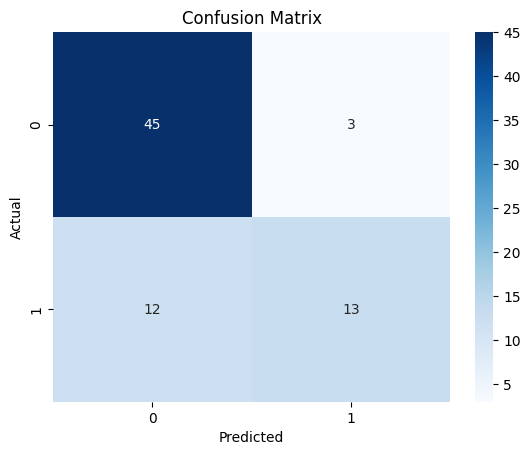

In [185]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Saving the model as pkl file**

In [186]:
# Save the model to a file
import joblib
model_path = 'random_forest_model.pkl'
joblib.dump(model, model_path)

['random_forest_model.pkl']

# **Step 8: Building the Predictive Model**

In [187]:
import numpy as np
import pandas as pd

# Define the input data as a dictionary
input_data = {
    'Pregnancies': 5,
    'Glucose': 116,
    'BloodPressure': 74,
    'SkinThickness': 0,
    'Insulin': 0,
    'BMI': 25.6,
    'DiabetesPedigreeFunction': 0.201,
    'Age': 30
}

# Create a DataFrame for the input data
input_data_df = pd.DataFrame(input_data, index=[0])

# Make a prediction
prediction = model.predict(input_data_df)
print(prediction)

# Interpret the prediction
if prediction[0] == 0:
    print('The Person does not have Diabetes')
else:
    print('The Person has Diabetes')


[0]
The Person does not have Diabetes


# **Step 9: Deployment of the model**

**streamlit_app.py**

In [188]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the model
model = joblib.load('random_forest_model.pkl')

# Define a function for making predictions
def predict_diabetes(input_data):
    input_data = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_data)
    return prediction[0]

def main():
    # Streamlit app title and description
    st.title('Diabetes Prediction')
    st.write('Enter the details below to predict the likelihood of having diabetes.')

    # Input fields for user data
    Pregnancies = st.slider("Number of Pregnancies", 0, 20, value=0)
    Glucose = st.slider("Glucose Level", 0, 200, value=120)
    BloodPressure = st.slider("Blood Pressure", 0, 200, value=80)
    SkinThickness = st.slider("Skin Thickness", 0, 100, value=20)
    Insulin = st.slider("Insulin Level", 0, 900, value=100)
    BMI = st.slider("BMI", 0.0, 70.0, value=25.0)
    DiabetesPedigreeFunction = st.slider("Diabetes Pedigree Function", 0.0, 3.0, value=0.5)
    Age = st.slider("Age", 0, 100, value=30)

    # Button to make prediction
    if st.button('Predict'):
        input_data = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
        prediction = predict_diabetes(input_data)

        if prediction == 1:
            st.write('The Person has Diabetes')
        else:
            st.write('The Person does not have Diabetes')

if __name__ == '__main__':
    main()

**To start the Streamlit application, use the following command in terminal:**

    streamlit run streamlit_app.py
